In [40]:
# Importamos librerías necesarías para la solución
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px

# Asignamos el documento csv a un dataframe llamadado 'datos'
datos = pd.read_csv("covid19_tweets.csv")

In [41]:
resaltado = sns.light_palette("green", as_cmap = True)
mapear = datos.head(10).style.background_gradient(cmap=resaltado)
mapear

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0",nan,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu,nan,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 @kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,"🎼 #Новоро́ссия #Novorossiya #оставайсядома #STAYatHOME Polymath, composer, English.",2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise. It's almost as bad as it ever was. Politicians and businesses want… https://t.co/hXMHooXX2C,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a friendly place. Corporate blog of @ITMGroup by @Sharlyn_Lauby. Cheers!,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,"How #COVID19 Will Change Work in General (and recruiting, specifically) via/ @ProactiveTalent #Recruiting… https://t.co/bjZxzGPMbK","['COVID19', 'Recruiting']",Buffer,False
7,Derbyshire LPC,nan,nan,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out shopping - this includes a visit to your local Community Pharmacy… https://t.co/OSu5Q4kdd7,nan,TweetDeck,False
8,Prathamesh Bendre,nan,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of @ChouhanShivraj . #covid19 #covidPositive,"['covid19', 'covidPositive']",Twitter for Android,False
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & all the members of the body, though many, are one body, so it is with Christ. 1 Corinthians 12:12",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. Watch here at https://t.co/7X5RTyKVji #HurricaneHanna #COVID19… https://t.co/06dZcGUnwL,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False


In [42]:
# Vemos la estadística básica de 'datos'
datos.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


In [43]:
# Veamos los followers
# El usuario con mayor followers tiene 13, 892, 795 followers
# Creamos otro Dataframe de usuarios con al menos 11, 000, 000 seguidores
# lo organizamos de mayor a menor e imprimimos

followers_datos = datos[datos['user_followers'] > 11000000]
followers_datos.sort_values(by = ['user_followers'], ascending = False)
followers_datos[['user_name','user_followers']].head()

,user_name,user_followers
235,CGTN,13892795
785,The Times Of India,12978547
1161,NDTV,13417047
1354,NDTV,13417047
2837,CGTN,13892793


In [44]:
# Obtenemos total de tweets de los usuarios con más followers
# Con la ayuda de Counter() y el dataframe followers_datos

cnt = Counter(followers_datos.user_name)
tot_tweets = []
for u, count in cnt.most_common(5):
    print ('%s: %7d' % (u, count))
    for val in range(count + 1):
        tot_tweets.append(u)

China Xinhua News:      49
The Times Of India:      42
NDTV:      40
CGTN:      18
United Nations:       7


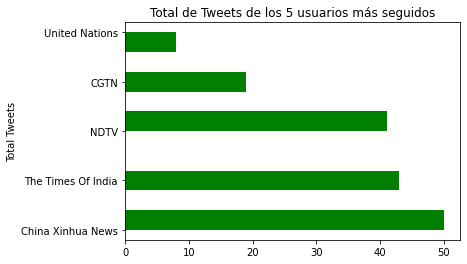

In [45]:
# Creamos un histograma donde se verá el total de tweets de los 5 usuarios
# con más followers
plt.hist(tot_tweets, color = 'green', orientation = 'horizontal')
plt.title('Total de Tweets de los 5 usuarios más seguidos')
plt.ylabel('Total Tweets')
plt.show()

In [46]:
# Counter para la sub dataframe que muestra los hashtags más comunes
cnt2 = Counter(followers_datos.hashtags)
tot_hashtags = []

for ht, count in cnt2.most_common(5):
    print ('%s: %7d' % (ht, count))
    for val in range(count + 1):
        tot_hashtags.append(ht)

['COVID19']:      86
nan:      19
['BigFight', 'COVID19']:       7
['BigFight']:       7
['APEC', 'COVID19']:       2


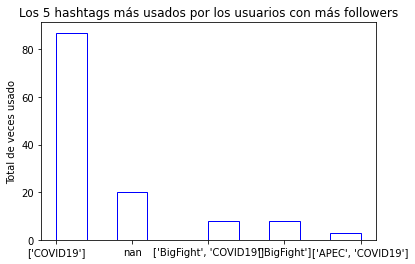

In [47]:
# mediante p¿matplotlib graficamos en histograma los hastags mas usados
plt.hist(tot_hashtags, color = 'blue', histtype = 'step')
plt.title('Los 5 hashtags más usados por los usuarios con más followers')
plt.ylabel('Total de veces usado')
plt.show()

In [48]:
# Obtenemos los tweets con más likes
# El tweet con más likes tiene 2,047,197
# Obtenemos dataframe que tengan likes mayores a 1, 100, 000

likes_datos = datos[datos['user_favourites'] > 1100000]
d1 = likes_datos.groupby(['user_name']).mean().sort_values(['user_favourites'], ascending = False).groupby("user_name").head(10)
dLikes = d1[['user_favourites']]
dLikes.head()

,user_favourites
user_name,
Chelsea Anderson.♥️,2047197.0
paolo ignazio marong,1153375.0


In [49]:
# 
cnt3 = Counter(likes_datos.user_name)
tot3 = []

for u, count in cnt3.most_common(5):
    print ('%s: %7d' % (u, count))
    for val in range(count + 1):
        tot3.append(u)

paolo ignazio marong:      13
Chelsea Anderson.♥️:       1


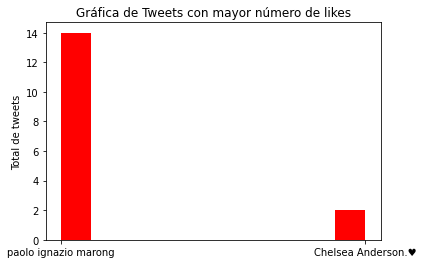

In [50]:
plt.hist(tot3, color = 'red')
plt.title('Gráfica de Tweets con mayor número de likes')
plt.ylabel('Total de tweets')
plt.show()

In [51]:
# Ahora vemos las fechas de cuando se publicaron los tweets con mayor número
# de likes

likes_datos = datos[datos['user_favourites'] > 1100000]
likes_datos.sort_values(by = ['user_favourites'], ascending = False)
likes_datos[['user_name','user_favourites', 'date']].head()


,user_name,user_favourites,date
14504,Chelsea Anderson.♥️,2047197,2020-07-25 01:44:18
18269,paolo ignazio marong,1151965,2020-07-26 08:35:28
18306,paolo ignazio marong,1151965,2020-07-26 08:33:39
18744,paolo ignazio marong,1151965,2020-07-26 08:11:16
18865,paolo ignazio marong,1151965,2020-07-26 08:04:24


In [52]:
# Vemos cuantos están verificados y cuantos no

cnt4 = Counter(datos.user_verified)

for u, count in cnt4.most_common(5):
    print ('%s: %7d' % (u, count))

False:   65082
True:    9354


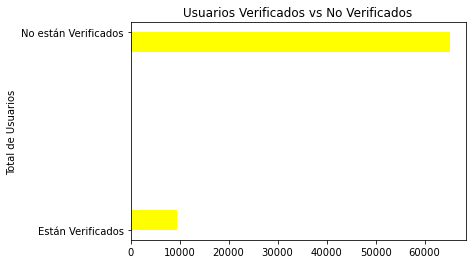

In [53]:
tot4 = []
t = 9354
f = 65082

for val in range(t + 1):
    tot4.append("Están Verificados")
for val in range(f + 1):
    tot4.append("No están Verificados")
    
plt.hist(tot4, color = 'yellow', orientation = 'horizontal')
plt.title('Usuarios Verificados vs No Verificados')
plt.ylabel('Total de Usuarios')
plt.show()

In [54]:
# Verified usuarios

verificados_datos = datos[datos['user_verified'] == True]
verificados_datos[['user_name','text']].head()

,user_name,text
1,Tom Basile 🇺🇸,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
21,APO Group English,Coronavirus - South Africa: COVID-19 update fo...
25,Blood Donors India,#Kolar\nNeed #Blood Type : B-positive\nAt : J...
39,ASHP,We released two new #COVID19 podcast episodes ...
43,TOI Delhi,"#Delhi reports 1,142 #COVID19 positive cases a..."


In [55]:
# Los tweets mas likeados con usuarios verificados

verificados_likes_datos = verificados_datos[verificados_datos['user_favourites'] > 200000]
verificados_likes_datos.sort_values(by = ['user_favourites'], ascending = False)
verificados_likes_datos[['user_name','user_favourites', 'text']].head()

,user_name,user_favourites,text
2514,Joyce Peterson,204655,FREE #COVID19 Drive-Thru Testing in DeSoto Cou...
3128,Holly Figueroa O'Reilly,200821,"So, Sinclair is going to run that Qanon conspi..."
12681,Joyce Peterson,204660,Walk with me. Dig the dance line on Beale Stre...
15997,Charles Gaba,567227,"Welp. By Sunday night, not only will New York ..."
16538,Carlos Gil 📙,350900,I'm grateful for colleagues who recognize that...


In [56]:
cnt5 = Counter(verificados_likes_datos.user_name)
tot5 = []

for u, count in cnt5.most_common(5):
    print ('%s: %7d' % (u, count))
    for val in range(count+1):
        tot5.append(u)

Charles Gaba:       9
Joyce Peterson:       4
CATHERINE Constantinides:       3
Kirk Borne:       3
David Weissman:       2


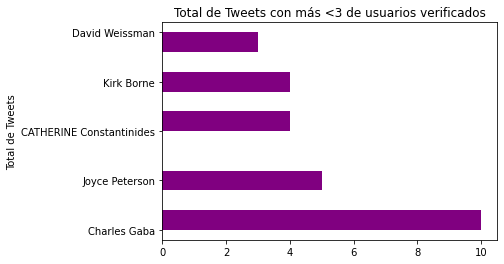

In [57]:
plt.hist(tot5, color = 'purple', orientation = 'horizontal')
plt.title('Total de Tweets con más <3 de usuarios verificados')
plt.ylabel('Total de Tweets')
plt.show()

In [58]:
# Mjeros tweets con más likes pero con usuario no verificados

noVerificados_datos = datos[datos['user_verified'] == False]
noVerificados_datos[['user_name','text']].head()

,user_name,text
0,ᏉᎥ☻լꂅϮ,If I smelled the scent of hand sanitizers toda...
2,Time4fisticuffs,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,25 July : Media Bulletin on Novel #CoronaVirus...
5,🎹 Franz Schubert,#coronavirus #covid19 deaths continue to rise....


In [59]:
noVerificados_likes_datos = noVerificados_datos[noVerificados_datos['user_favourites'] > 600000]
noVerificados_likes_datos.sort_values(by = ['user_favourites'], ascending = False)
noVerificados_likes_datos[['user_name','user_favourites', 'text']].head()

,user_name,user_favourites,text
7614,@Splashing Lights Photos,656341,@Angel_nookies_ Me neither. Wouldn't do it pos...
11946,@Splashing Lights Photos,656341,Sporting masks should be a nationwide mandate....
12668,James Jayi Wang,639931,"86/ #COVID19 #coronavirus\nFRI JULY 24, 2020\n..."
13099,Brian E. Logan,605134,@mick_inLa @MomofTwonodigit @NYPDnews @UPS @Le...
14504,Chelsea Anderson.♥️,2047197,So Trump wants everyone else's child to get #C...


In [60]:
cnt6 = Counter(noVerificados_likes_datos.user_name)
tot6 = []

for u, count in cnt6.most_common(5):
    print ('%s: %7d' % (u, count))
    for val in range(count+1):
        tot6.append(u)

paolo ignazio marong:      13
VonVictor V. Rosenchild:       5
Brian E. Logan:       3
David Lance #FBPE #WATON:       3
Helen _ 5calls.org:       3


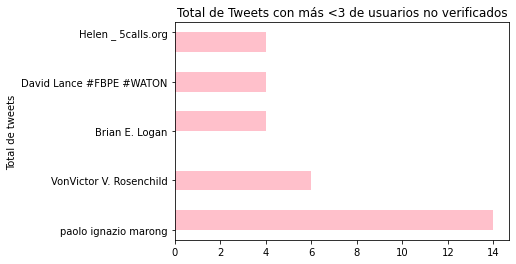

In [61]:
plt.hist(tot6, color = 'pink', orientation = 'horizontal')
plt.title('Total de Tweets con más <3 de usuarios no verificados')
plt.ylabel('Total de tweets')
plt.show()

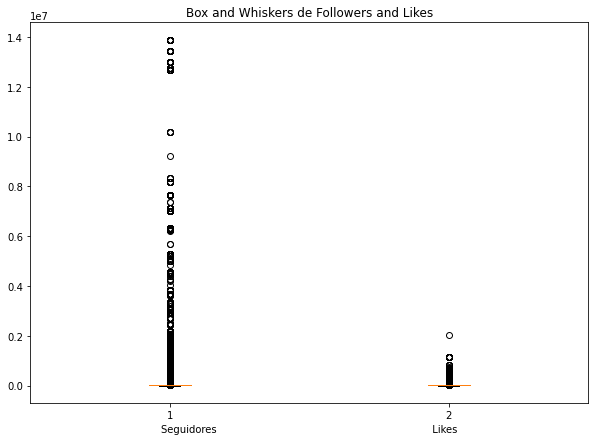

In [62]:
tot_followers = datos['user_followers']
tot_likes = datos['user_favourites']
vals = [tot_followers, tot_likes]

figura = plt.figure(figsize = (10, 7))
plt.boxplot(vals)
plt.title('Box and Whiskers de Followers and Likes',)
plt.xlabel('Seguidores                                                                     Likes')
plt.show() 

<AxesSubplot:>

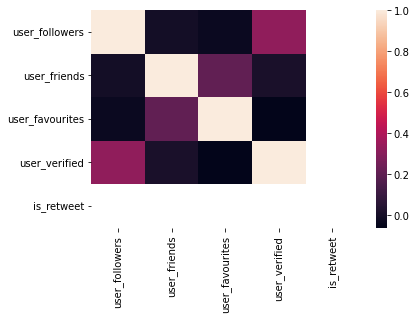

In [63]:
correlacionPearson = datos.corr(method ='pearson')
sns.heatmap(correlacionPearson, xticklabels = correlacionPearson.columns,
            yticklabels = correlacionPearson.columns)

In [64]:
# Tabla dinámica con índice source para determinar el tamaño de cada una
fuentes = datos.pivot_table(index = ['source'], aggfunc = 'size')
fuentes.sort_values(ascending = False)

source
Twitter Web App               22974
Twitter for Android           16758
Twitter for iPhone            15824
TweetDeck                      3453
Hootsuite Inc.                 2846
                              ...  
Dynamics 365 for Marketing        1
Konnect Social                    1
Downtime Monkey                   1
DopeyUncle2                       1
Fenix for Android                 1
Length: 450, dtype: int64

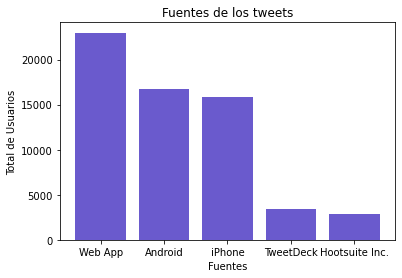

In [65]:
# Graficar fuentes más usadas por usuarios

nombres = ["Web App", "Android", "iPhone","TweetDeck","Hootsuite Inc."]

tot_Fuentes = []
tot_Fuentes.append(fuentes["Twitter Web App"])
tot_Fuentes.append(fuentes["Twitter for Android"])
tot_Fuentes.append(fuentes["Twitter for iPhone"])
tot_Fuentes.append(fuentes["TweetDeck"])
tot_Fuentes.append(fuentes["Hootsuite Inc."])

plt.bar(nombres, tot_Fuentes, color = 'slateblue')
plt.title("Fuentes de los tweets")
plt.xlabel("Fuentes")
plt.ylabel("Total de Usuarios")
plt.show()

In [66]:
# Ubicar las 5 ubicaciones más repetidas
ubicaciones_datos = pd.DataFrame(datos)
ubicaciones = ubicaciones_datos['user_location'].value_counts()
ubicaciones[0:5]

India               1496
United States       1172
New Delhi, India     669
Washington, DC       589
Mumbai, India        554
Name: user_location, dtype: int64

In [67]:
from wordcloud import WordCloud
import re

def text_cleaner(text) :
    #text = re. sub(' (It'text)
    text=re.sub(r"\n"," ",str(text))
    text=re.sub(r"\t"," ",str(text))
    text=re.sub(r"\r"," ",str(text))
    text=re.sub(r"(@)|(#)|(RT[\s]+)|(https?\/\/\S+)|([^a-zA-Z0-9 -])", "",str(text))
    text=text.strip(" ")
    return text


#dat= text_cleaner(datos)

def wordcloud(df, feature):
    wordcloud = WordCloud(width = 1200,
                         height = 800,
                         max_words = 200,
                         min_word_length = 4,
                         max_font_size = 130, min_font_size = 15,
                         background_color ='white').generate("".join(df[feature]))
    plt.figure(figsize = (20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    
datos['text'] = datos['text'].apply(text_cleaner)
datos['user_description'] = datos['user_description'].apply(text_cleaner)
datos['user_location'] = datos['user_location'].apply(text_cleaner)
datos['hashtags'] = datos['hashtags'].apply(text_cleaner)

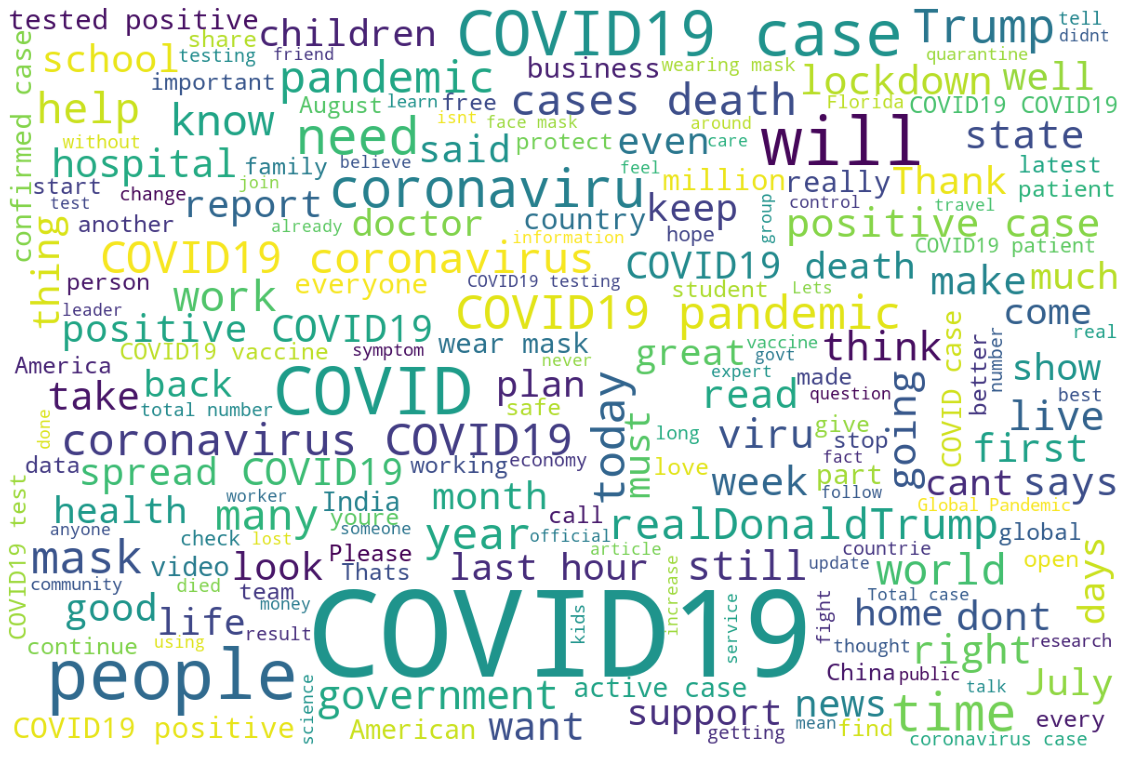

In [68]:
#tweets
wordcloud(datos, 'text')

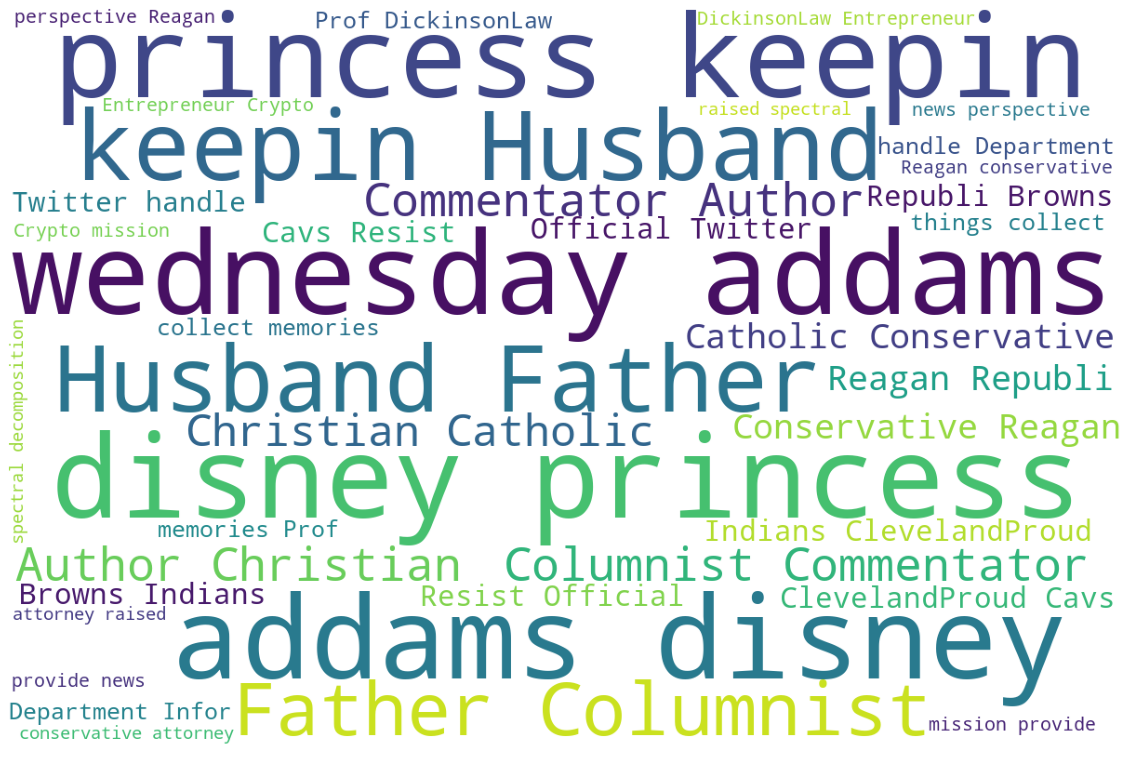

In [69]:
#descripcion
datos['user_description'] = repr(datos['user_description'])
wordcloud(datos,'user_description')

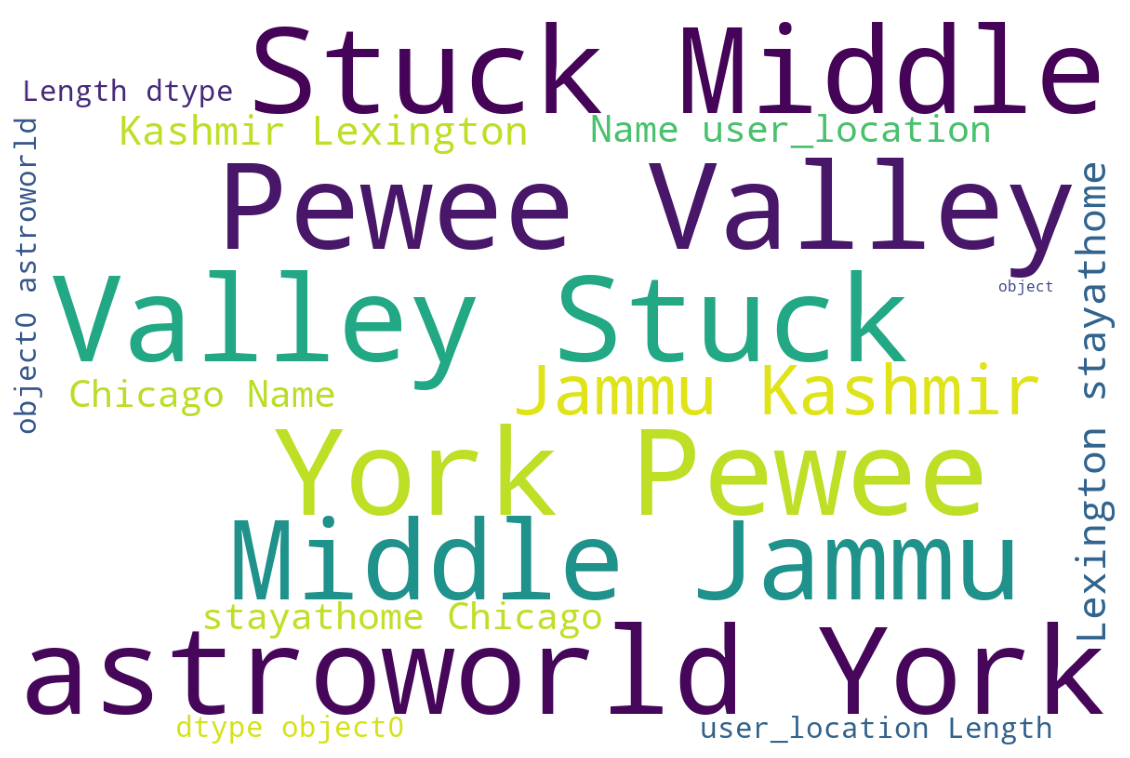

In [70]:
#location
datos['user_location'] = repr(datos['user_location'])
wordcloud(datos,'user_location')

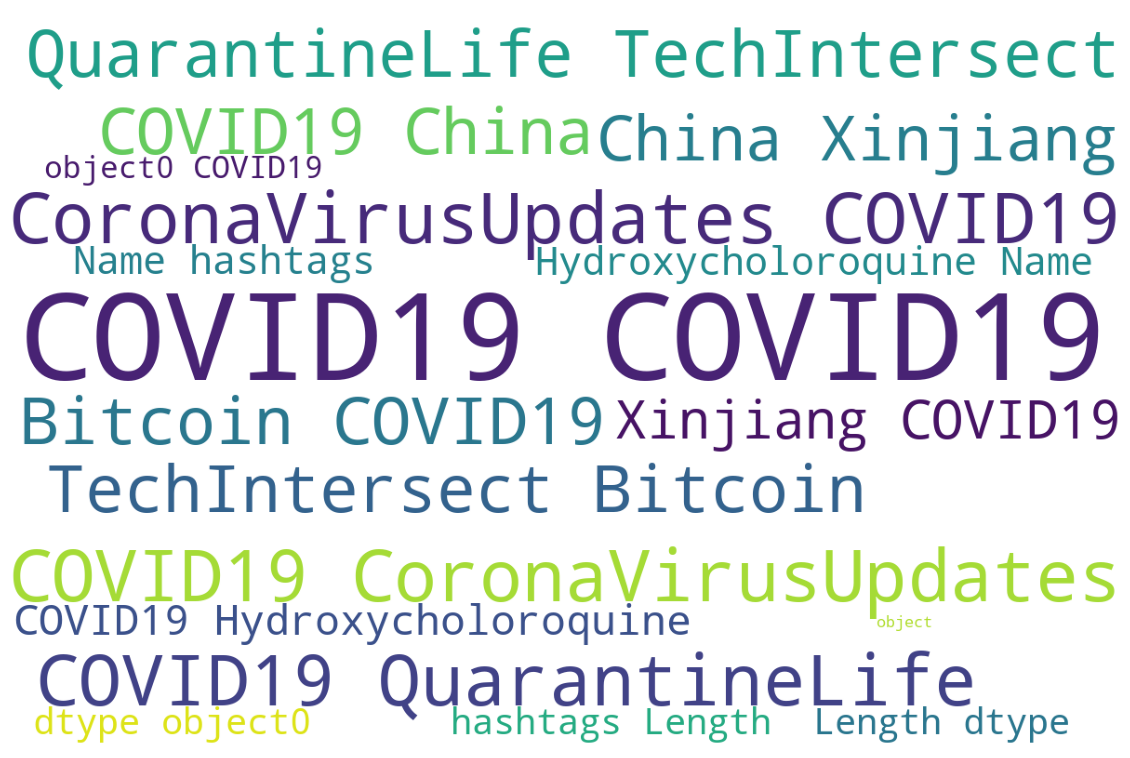

In [71]:
#hashtags
datos['hashtags'] = repr(datos['hashtags'])
wordcloud(datos,'hashtags')

In [83]:
datos = pd.read_csv("covid19_tweets.csv")
datos['date'] = pd.to_datetime(datos['date']) 
datos = datos.sort_values(['date'])
datos['day'] = datos['date'].astype(str).str.split(' ', expand=True)[0]
datos['time'] = datos['date'].astype(str).str.split(' ', expand=True)[1]
datos.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,day,time
17175,Jessica Luther Rummel,"Denton, Texas",Mother. Partner. Scholar. Activist. Alchemist....,2020-07-05 03:28:16,234,28,220,False,2020-07-24 23:47:08,PROTESTORS NEEDED 6PM-10PM DAILY (NOW). 1450 E...,NaN,Twitter Web App,False,2020-07-24,23:47:08
17174,Dr. Lipi #TrustDrFauci Roy,"New York, USA",@NBCNews @MSNBC @Forbes Medical Contributor | ...,2009-10-11 18:46:51,12485,4603,38120,True,2020-07-24 23:47:12,Always honored to speak w @NicolleDWallace abo...,['covid19'],Twitter Web App,False,2020-07-24,23:47:12
17173,Patty Hayes,"Seattle, WA",Director of Public Health - Seattle & King Cou...,2017-07-07 18:56:50,718,162,2276,False,2020-07-24 23:47:12,"Excellent partnership to prevent #COVID19, tha...",['COVID19'],Twitter for Android,False,2020-07-24,23:47:12
17172,Clive Gorman,"Victoria, British Columbia",Marketing Director @CNEGames for @idlechampion...,2011-12-23 02:02:35,597,224,23824,False,2020-07-24 23:47:12,Don't take your eye off the ball. There are st...,['COVID19'],Twitter for Android,False,2020-07-24,23:47:12
17171,Tristyn Russelo,"Alberta, Canada",NaN,2017-06-14 22:01:54,5,68,57,False,2020-07-24 23:47:13,"Apparently, at the Timberlea @saveonfoods stor...",NaN,Twitter Web App,False,2020-07-24,23:47:13


In [87]:
fechas = datos['day'].value_counts().reset_index()
fechas.columns = ['day', 'count']
fechas = fechas.sort_values('count')

fechas['day'] = fechas['day'].astype(str) + ':00:00:00'

fig = px.bar(
    fechas, 
    x='count', 
    y="day", 
    orientation='h',
    title='Tweets distribution over days present in dataset',
    width=800, 
    height=800
)
fig.show()
#Comentario